In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, GRU, LSTM, Bidirectional
from keras import losses, metrics, optimizers
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

2023-07-08 10:10:31.419380: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-08 10:10:31.440928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train, x_test = pad_sequences(x_train, maxlen=maxlen), pad_sequences(x_test, maxlen=maxlen)

In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
res = model.fit(x_train, y_train, batch_size=300, epochs=10, validation_split=0.35)

Epoch 1/10
55/55 [==============================] - 4s 66ms/step - loss: 0.6151 - accuracy: 0.6516 - val_loss: 0.5444 - val_accuracy: 0.7584
Epoch 2/10
55/55 [==============================] - 4s 70ms/step - loss: 0.4114 - accuracy: 0.8340 - val_loss: 0.3855 - val_accuracy: 0.8367
Epoch 3/10
55/55 [==============================] - 3s 64ms/step - loss: 0.3129 - accuracy: 0.8793 - val_loss: 0.3624 - val_accuracy: 0.8471
Epoch 4/10
55/55 [==============================] - 4s 64ms/step - loss: 0.2569 - accuracy: 0.9049 - val_loss: 0.3664 - val_accuracy: 0.8517
Epoch 5/10
55/55 [==============================] - 4s 65ms/step - loss: 0.2949 - accuracy: 0.8797 - val_loss: 0.3962 - val_accuracy: 0.8469
Epoch 6/10
55/55 [==============================] - 4s 64ms/step - loss: 0.1860 - accuracy: 0.9345 - val_loss: 0.3712 - val_accuracy: 0.8528
Epoch 7/10
55/55 [==============================] - 4s 70ms/step - loss: 0.1277 - accuracy: 0.9600 - val_loss: 0.3719 - val_accuracy: 0.8503
Epoch 8/10
55

In [5]:
htr = res.history
loss = htr['loss']
val_loss = htr['val_loss']
accuracy = htr['accuracy']
val_accuracy = htr['val_accuracy']
epochs = range(1, len(accuracy) + 1)

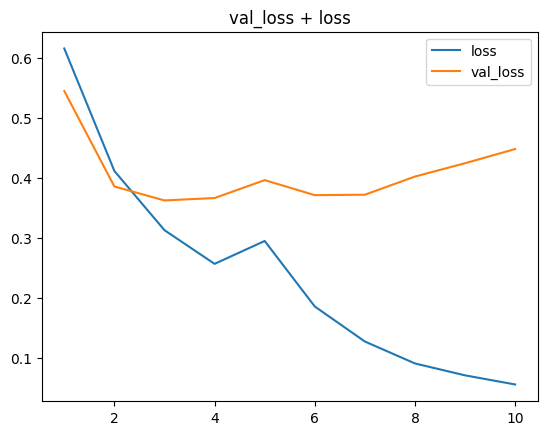

In [6]:
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('val_loss + loss')
plt.legend()
plt.show()

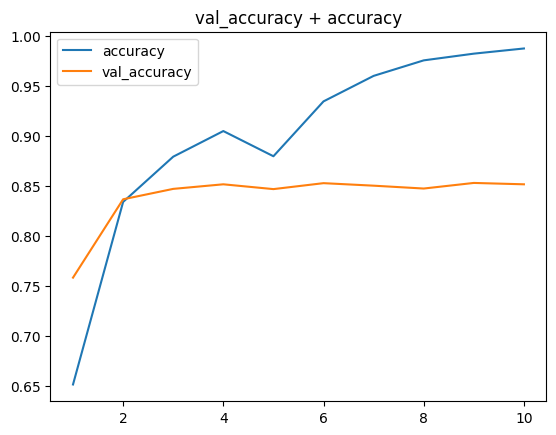

In [7]:
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('val_accuracy + accuracy')
plt.legend()
plt.show()

In [16]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 32))
model_gru.add(GRU(32))
model_gru.add(Dense(300, activation='relu'))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
res_gru = model_gru.fit(x_train, y_train, batch_size=300, epochs=10, validation_split=0.35)

Epoch 1/10
55/55 [==============================] - 9s 140ms/step - loss: 0.6678 - accuracy: 0.5873 - val_loss: 0.5393 - val_accuracy: 0.7285
Epoch 2/10
55/55 [==============================] - 9s 157ms/step - loss: 0.3612 - accuracy: 0.8407 - val_loss: 0.3077 - val_accuracy: 0.8723
Epoch 3/10
55/55 [==============================] - 8s 153ms/step - loss: 0.2054 - accuracy: 0.9226 - val_loss: 0.4261 - val_accuracy: 0.8415
Epoch 4/10
55/55 [==============================] - 8s 153ms/step - loss: 0.1455 - accuracy: 0.9486 - val_loss: 0.3543 - val_accuracy: 0.8742
Epoch 5/10
55/55 [==============================] - 8s 153ms/step - loss: 0.1033 - accuracy: 0.9657 - val_loss: 0.4033 - val_accuracy: 0.8719
Epoch 6/10
55/55 [==============================] - 9s 163ms/step - loss: 0.0756 - accuracy: 0.9767 - val_loss: 0.4670 - val_accuracy: 0.8691
Epoch 7/10
55/55 [==============================] - 8s 154ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.5356 - val_accuracy: 0.8621
Epoch 

In [18]:
htr_gru = res_gru.history
loss_gru = htr_gru['loss']
val_loss_gru = htr_gru['val_loss']
accuracy_gru = htr_gru['accuracy']
val_accuracy_gru = htr_gru['val_accuracy']
epochs_gru = range(1, len(accuracy_gru) + 1)

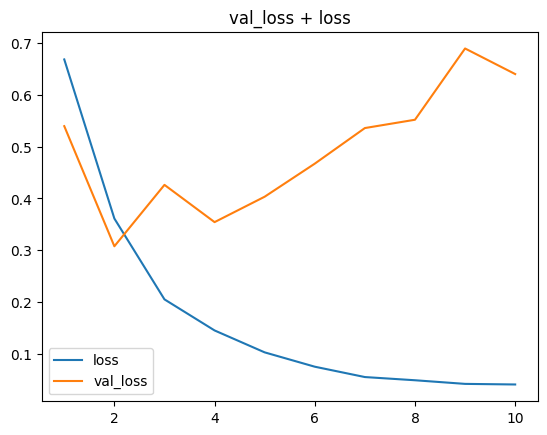

In [20]:
plt.plot(epochs_gru, loss_gru, label='loss')
plt.plot(epochs_gru, val_loss_gru, label='val_loss')
plt.title('val_loss + loss')
plt.legend()
plt.show()

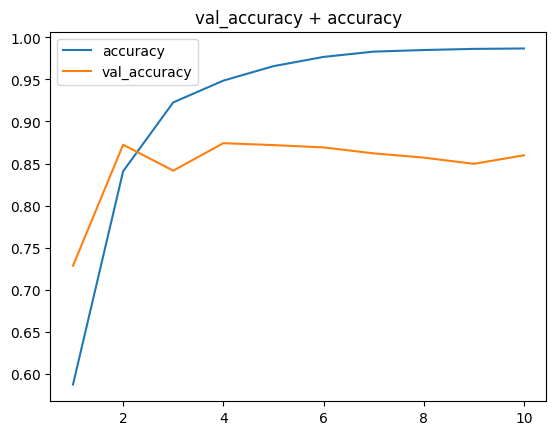

In [21]:
plt.plot(epochs_gru, accuracy_gru, label='accuracy')
plt.plot(epochs_gru, val_accuracy_gru, label='val_accuracy')
plt.title('val_accuracy + accuracy')
plt.legend()
plt.show()

In [35]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
res_lstm = model_lstm.fit(x_train, y_train, batch_size=300, epochs=10, validation_split=0.35)

Epoch 1/10
55/55 [==============================] - 10s 164ms/step - loss: 0.6386 - accuracy: 0.6406 - val_loss: 0.5088 - val_accuracy: 0.7869
Epoch 2/10
55/55 [==============================] - 9s 168ms/step - loss: 0.3779 - accuracy: 0.8542 - val_loss: 0.5174 - val_accuracy: 0.7710
Epoch 3/10
55/55 [==============================] - 10s 175ms/step - loss: 0.2873 - accuracy: 0.8890 - val_loss: 0.3030 - val_accuracy: 0.8800
Epoch 4/10
55/55 [==============================] - 9s 170ms/step - loss: 0.1884 - accuracy: 0.9359 - val_loss: 0.2938 - val_accuracy: 0.8819
Epoch 5/10
55/55 [==============================] - 9s 170ms/step - loss: 0.1407 - accuracy: 0.9575 - val_loss: 0.3341 - val_accuracy: 0.8734
Epoch 6/10
55/55 [==============================] - 10s 177ms/step - loss: 0.1107 - accuracy: 0.9683 - val_loss: 0.3611 - val_accuracy: 0.8741
Epoch 7/10
55/55 [==============================] - 10s 180ms/step - loss: 0.0980 - accuracy: 0.9721 - val_loss: 0.5180 - val_accuracy: 0.8321
Ep

In [37]:
htr_lstm = res_lstm.history
loss_lstm = htr_lstm['loss']
val_loss_lstm = htr_lstm['val_loss']
accuracy_lstm = htr_lstm['accuracy']
val_accuracy_lstm = htr_lstm['val_accuracy']
epochs_lstm = range(1, len(accuracy_lstm) + 1)

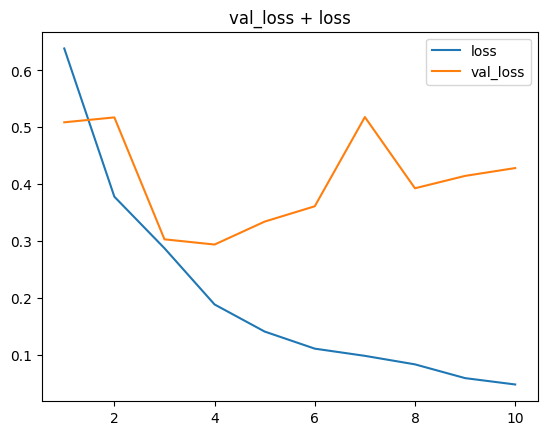

In [38]:
plt.plot(epochs_lstm, loss_lstm, label='loss')
plt.plot(epochs_lstm, val_loss_lstm, label='val_loss')
plt.title('val_loss + loss')
plt.legend()
plt.show()

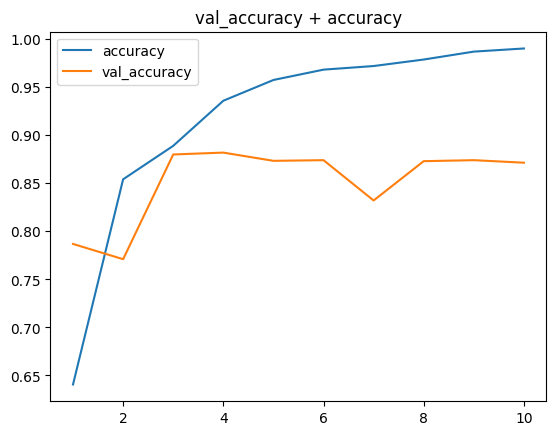

In [39]:
plt.plot(epochs_lstm, accuracy_lstm, label='accuracy')
plt.plot(epochs_lstm, val_accuracy_lstm, label='val_accuracy')
plt.title('val_accuracy + accuracy')
plt.legend()
plt.show()

In [41]:
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32))
model_brnn.add(Bidirectional(LSTM(32)))
model_brnn.add(Dense(1, activation='sigmoid'))
model_brnn.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
res_brnn = model_brnn.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.35)

Epoch 1/5
508/508 [==============================] - 43s 82ms/step - loss: 0.4733 - accuracy: 0.7729 - val_loss: 0.3459 - val_accuracy: 0.8555
Epoch 2/5
508/508 [==============================] - 44s 87ms/step - loss: 0.2500 - accuracy: 0.9020 - val_loss: 0.3300 - val_accuracy: 0.8779
Epoch 3/5
508/508 [==============================] - 46s 90ms/step - loss: 0.1693 - accuracy: 0.9412 - val_loss: 0.3394 - val_accuracy: 0.8824
Epoch 4/5
508/508 [==============================] - 46s 91ms/step - loss: 0.1211 - accuracy: 0.9596 - val_loss: 0.3743 - val_accuracy: 0.8744
Epoch 5/5
508/508 [==============================] - 51s 100ms/step - loss: 0.0949 - accuracy: 0.9689 - val_loss: 0.4038 - val_accuracy: 0.8695


In [43]:
htr_brnn = res_brnn.history
loss_brnn = htr_brnn['loss']
val_loss_brnn = htr_brnn['val_loss']
accuracy_brnn = htr_brnn['accuracy']
val_accuracy_brnn = htr_brnn['val_accuracy']
epochs_brnn = range(1, len(accuracy_brnn) + 1)

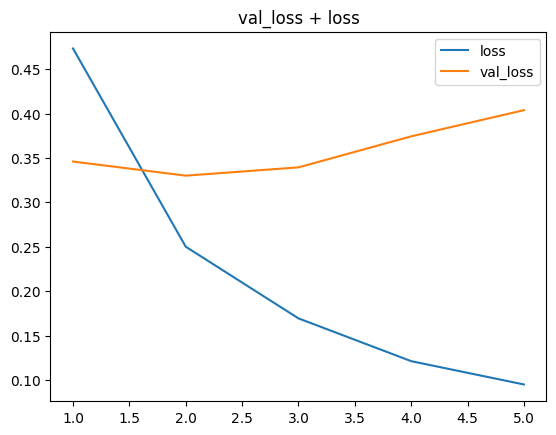

In [44]:
plt.plot(epochs_brnn, loss_brnn, label='loss')
plt.plot(epochs_brnn, val_loss_brnn, label='val_loss')
plt.title('val_loss + loss')
plt.legend()
plt.show()

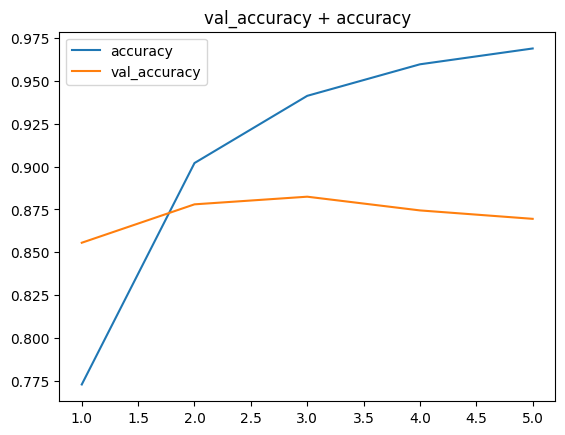

In [45]:
plt.plot(epochs_brnn, accuracy_brnn, label='accuracy')
plt.plot(epochs_brnn, val_accuracy_brnn, label='val_accuracy')
plt.title('val_accuracy + accuracy')
plt.legend()
plt.show()

In [58]:
model_drnn = Sequential()
model_drnn.add(Embedding(max_features, 90))
model_drnn.add(Bidirectional(LSTM(90, return_sequences=True)))
model_drnn.add(Bidirectional(LSTM(90)))
model_drnn.add(Dense(1, activation='sigmoid'))
model_drnn.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
res_drnn = model_drnn.fit(x_train, y_train, batch_size=100, epochs=5, validation_split=0.35)

Epoch 1/5
163/163 [==============================] - 127s 763ms/step - loss: 0.4601 - accuracy: 0.7790 - val_loss: 0.3317 - val_accuracy: 0.8619
Epoch 2/5
163/163 [==============================] - 125s 767ms/step - loss: 0.2250 - accuracy: 0.9164 - val_loss: 0.2921 - val_accuracy: 0.8816
Epoch 3/5
163/163 [==============================] - 125s 768ms/step - loss: 0.1412 - accuracy: 0.9524 - val_loss: 0.3512 - val_accuracy: 0.8672
Epoch 4/5
163/163 [==============================] - 125s 769ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.5033 - val_accuracy: 0.8584
Epoch 5/5
163/163 [==============================] - 126s 776ms/step - loss: 0.0720 - accuracy: 0.9782 - val_loss: 0.4812 - val_accuracy: 0.8640


In [60]:
htr_drnn = res_drnn.history
loss_drnn = htr_drnn['loss']
val_loss_drnn = htr_drnn['val_loss']
accuracy_drnn = htr_drnn['accuracy']
val_accuracy_drnn = htr_drnn['val_accuracy']
epochs_drnn = range(1, len(accuracy_drnn) + 1)

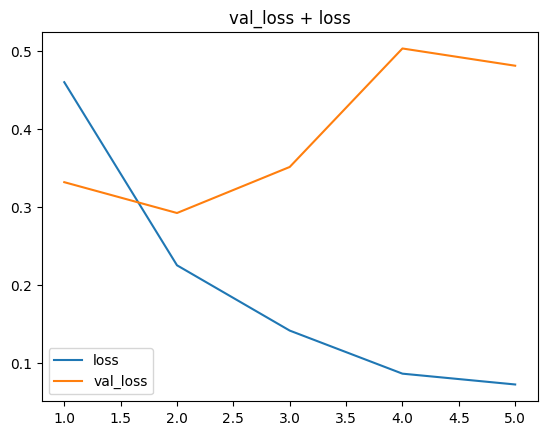

In [61]:
plt.plot(epochs_drnn, loss_drnn, label='loss')
plt.plot(epochs_drnn, val_loss_drnn, label='val_loss')
plt.title('val_loss + loss')
plt.legend()
plt.show()

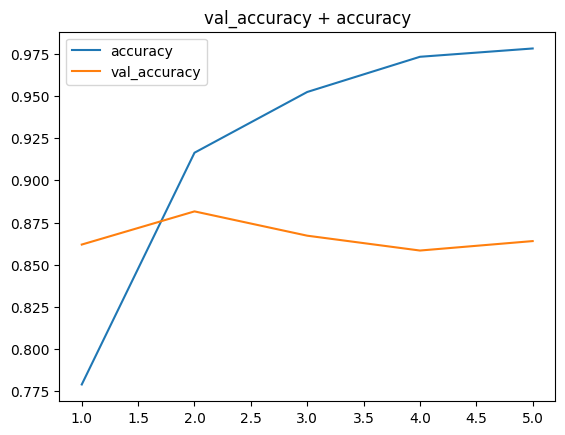

In [62]:
plt.plot(epochs_drnn, accuracy_drnn, label='accuracy')
plt.plot(epochs_drnn, val_accuracy_drnn, label='val_accuracy')
plt.title('val_accuracy + accuracy')
plt.legend()
plt.show()